# Census Income Prediction

## Introduction about the Data

prediction task is to determine whether a person makes a 50k a year.(classification Analysis)

There are 14 independent variables.

    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous.
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: continuous.
    capital-loss: continuous.
    hours-per-week: continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target variable:
    
    Income:>50K, <=50K.
        
        Dataset source link: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [3]:
## Data Ingestion Step
import pandas as pd
df=pd.read_csv('data/Census_Income_Data Set.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [7]:
## NO Missing values present in the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
## Check for duplicated records
df.duplicated().sum()

24

## observation

1. duplicated objects present in dataset
2. so drop duplicates

In [10]:
# drop duplicates
df=df.drop_duplicates(keep='first')

In [11]:
df.shape

(32537, 15)

In [12]:
df['workclass'].value_counts()

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

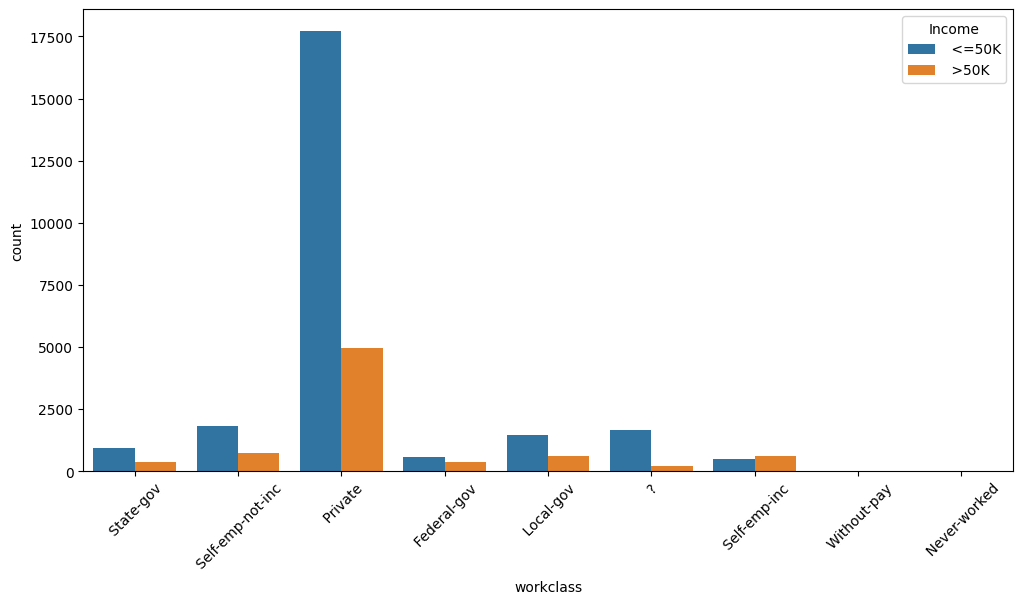

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['workclass'],hue=df['Income'])
plt.xticks(rotation=45)
plt.show()

## Observations
1. Majority of a private employes are highest
2. Ratio of people earning more than 50K is higher in case Workclass is ‘Self-emp-inc’.
3. Missing values are present in workclass column."?"

In [15]:
df['education'].value_counts()

education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64

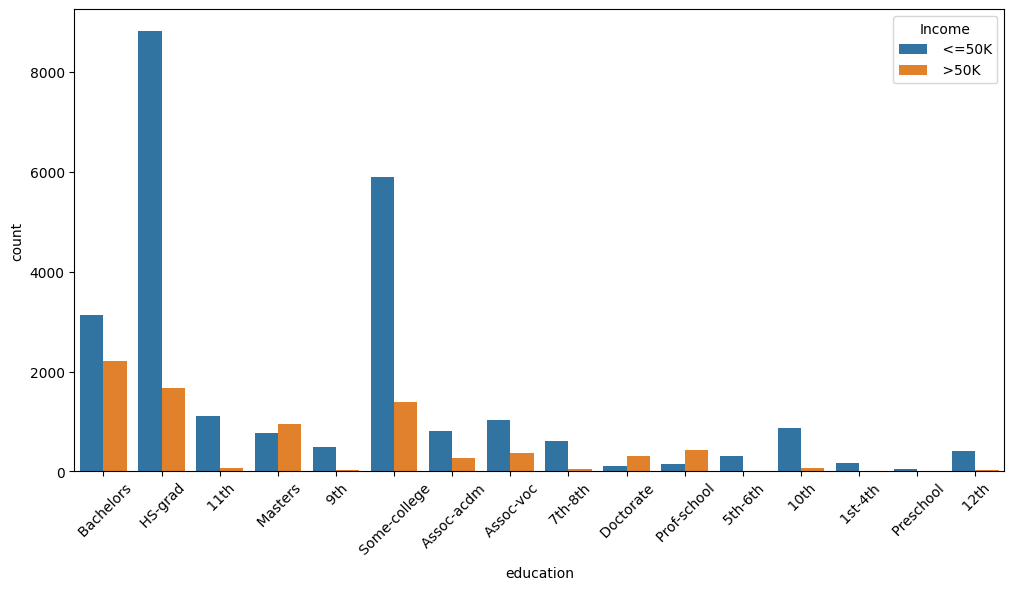

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['education'],hue=df['Income'])
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

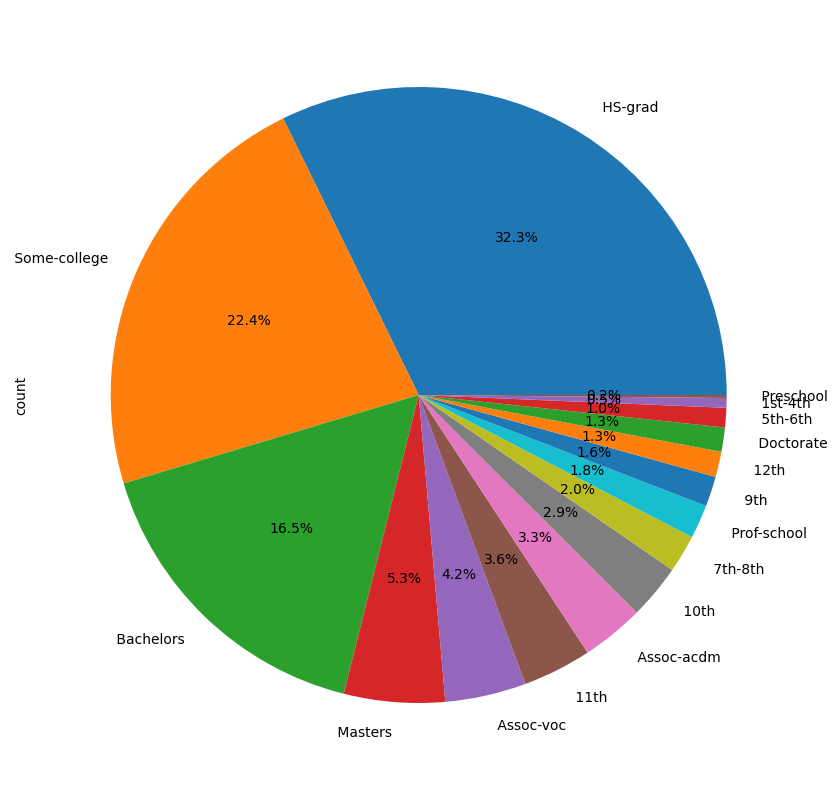

In [17]:
df['education'].value_counts().plot.pie(y=df['education'],figsize = (10,10),autopct='%1.1f%%')

## Observations
1. People with education level as ‘Masters/Doctorate/Prof-school’ have higher ratios of >50K earning,than <=50K.
2. Bachelors are also earn <=50K or >50K

In [18]:
df['marital-status'].value_counts()

marital-status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

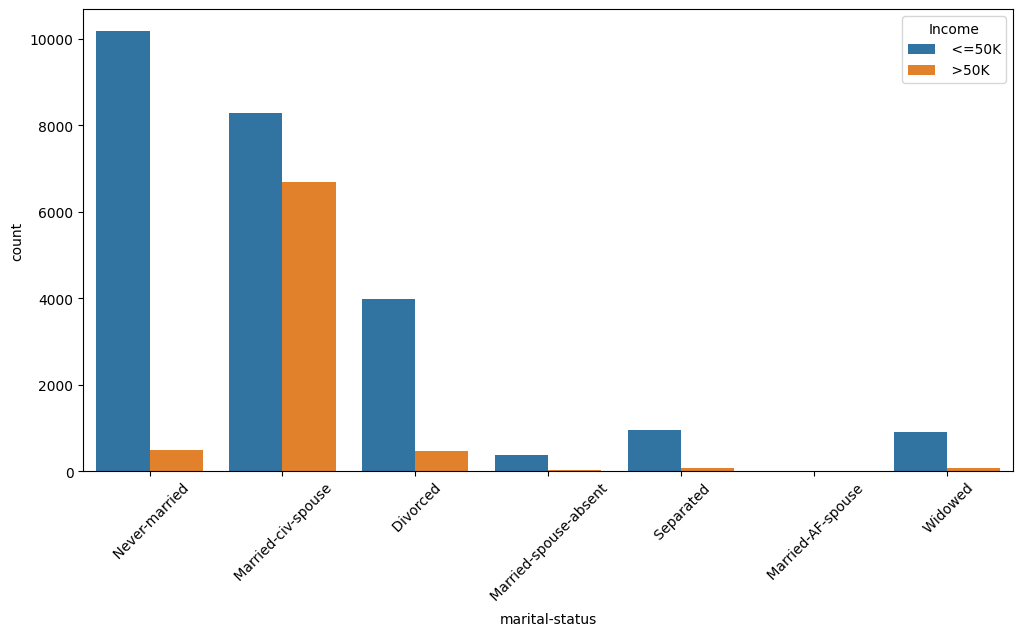

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['marital-status'],hue=df['Income'])
plt.xticks(rotation=45)
plt.show()

## Observation 
1. Most of the people earning >50K are Married-civ-spouse.
2. MOst of the people earning <=50K are Never-married
3. Difference between in this columns are very high

In [20]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [21]:
df['occupation'].value_counts()

occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

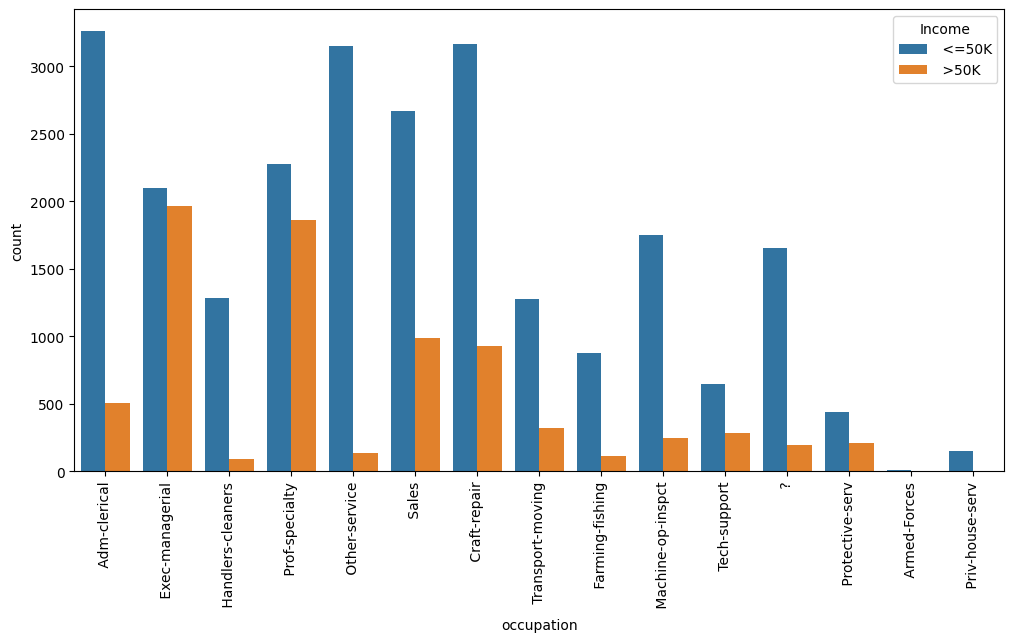

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['occupation'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

## Observation 
1. Most of the people earning >50K are Exec-managerial.
2. MOst of the people earning <=50K are Other-service.
3. Occupation feature some messing values are present."?"

In [23]:
df['relationship'].value_counts()

relationship
 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

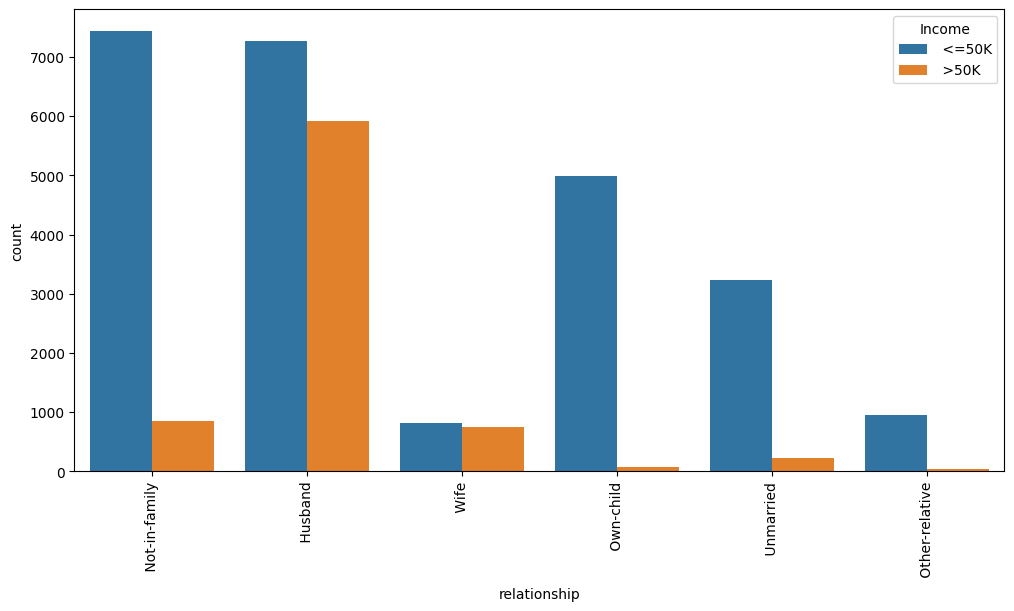

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['relationship'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

## Observation 
1. If the relationship between 'Husband/Wife' earning >50K.
2. Own chid is earning <=50K.


In [25]:
df['race'].value_counts()

race
 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

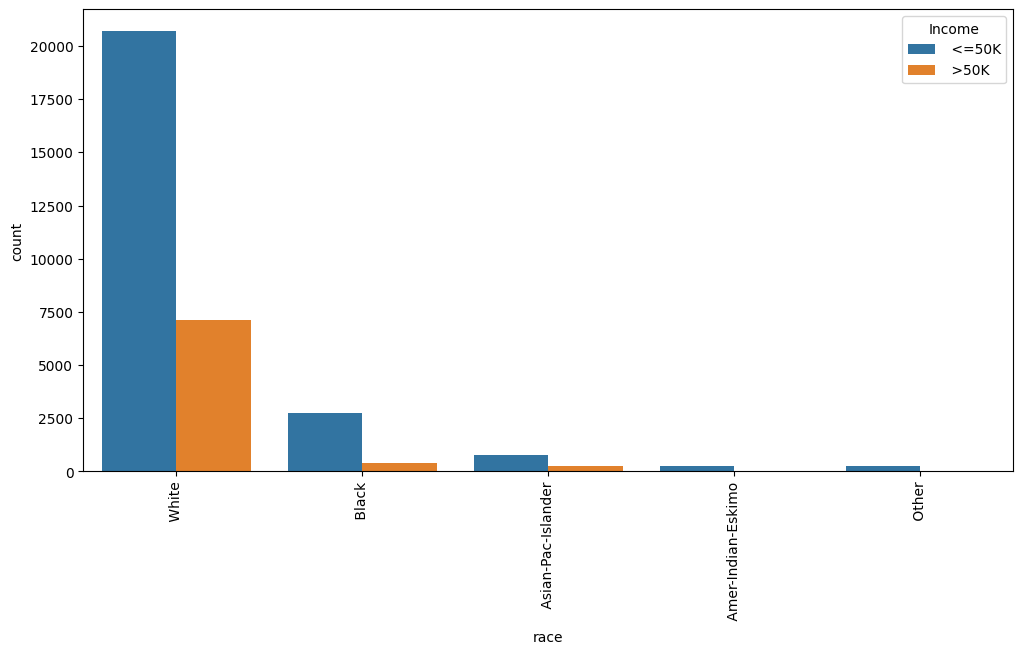

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['race'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

## Observation
- Here chances to White peoples are earning >50K.

In [27]:
df['sex'].value_counts()

sex
 Male      21775
 Female    10762
Name: count, dtype: int64

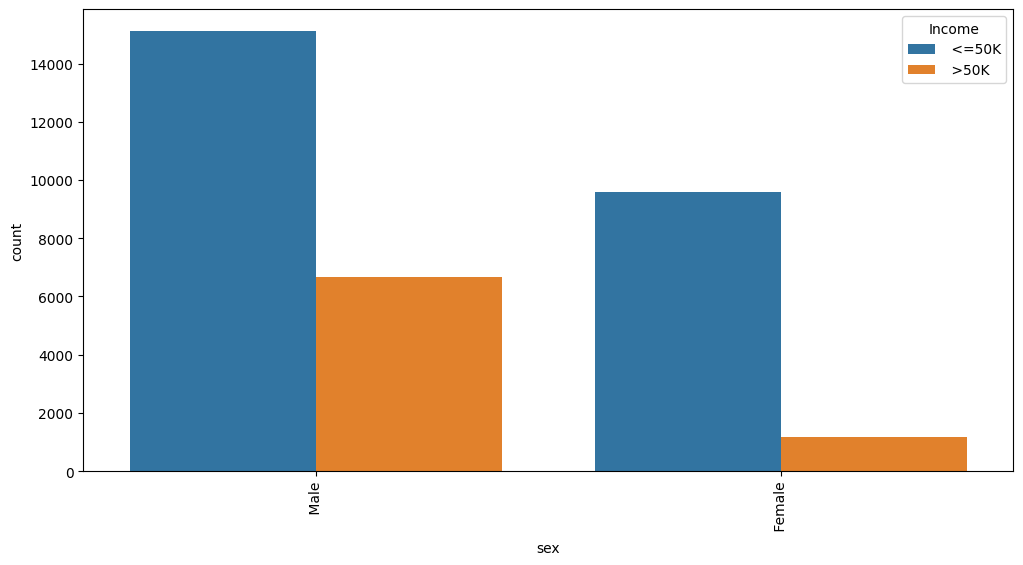

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['sex'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

## Observation
- Male are earning more as compare to Females

In [29]:
df['native-country'].value_counts()

native-country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

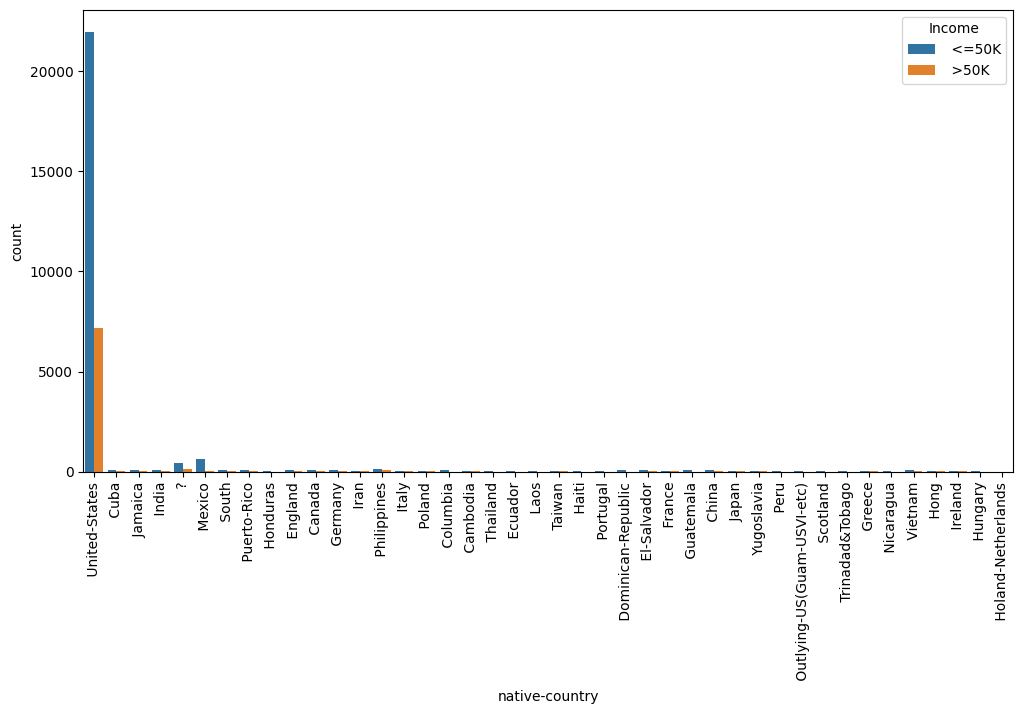

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['native-country'],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

## Observations
- Most of the peoples belongs to United-States and earning >50K.
- Missing values are present this native-country column.

In [31]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


# Numerical Features

In [32]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='object']

In [33]:
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

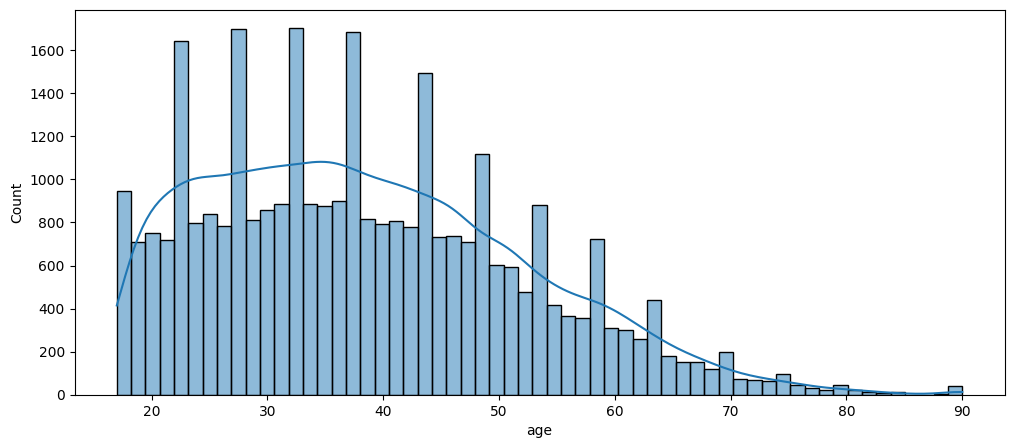

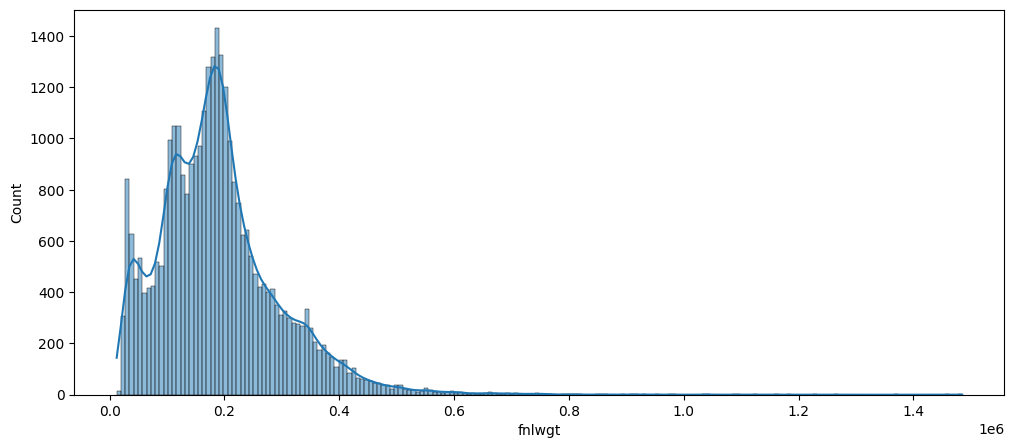

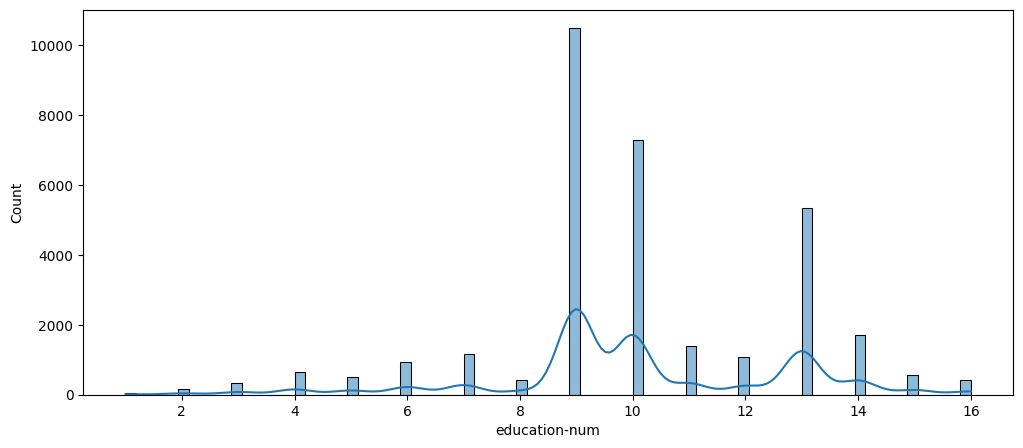

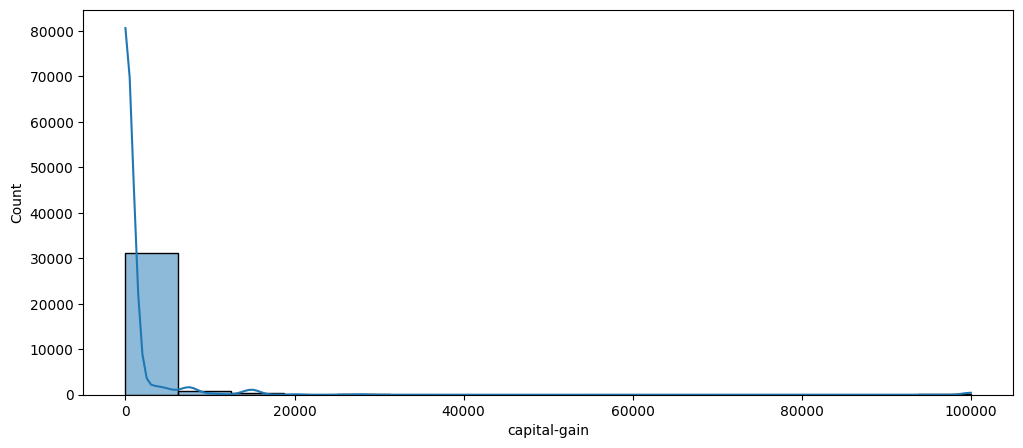

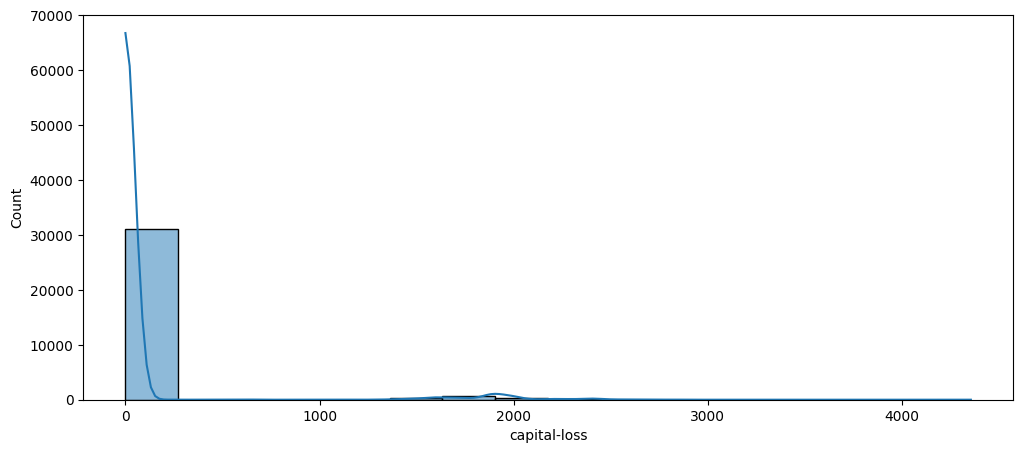

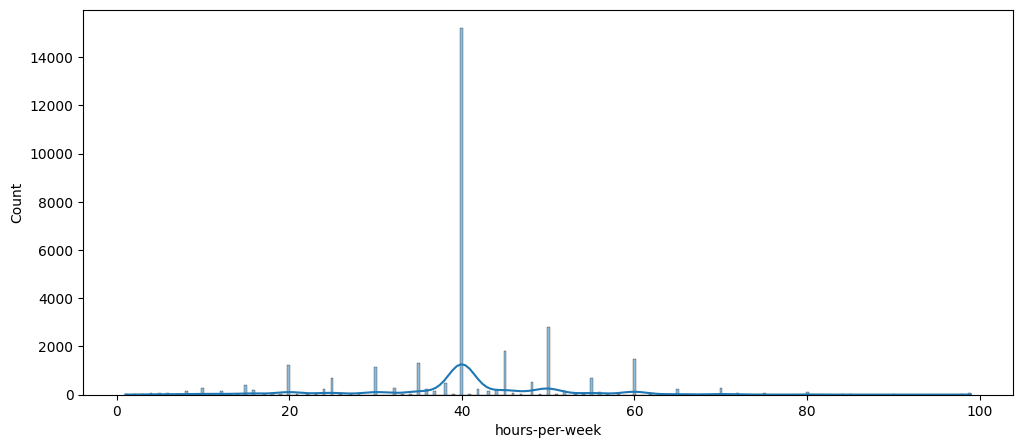

In [34]:
for i in numerical_features:
    plt.figure(figsize=(12,5))
    sns.histplot(df[i],kde=True)
    plt.show()

# Observation
- Age column is slightly-right skewed or positively skewed.
- most peoples are capital-gain or capital-loss are 0
- hours-per-week column most of the peoples worked 40hrs per weak
- most of the peoples education level lies in 9

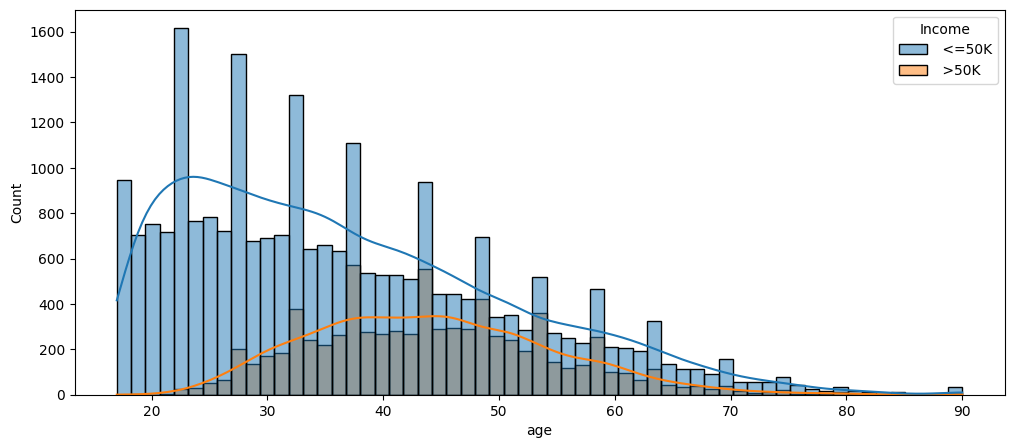

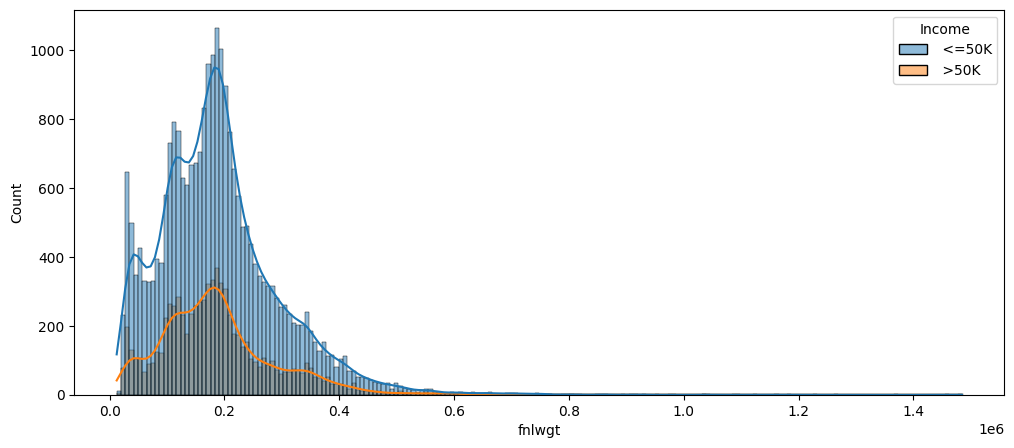

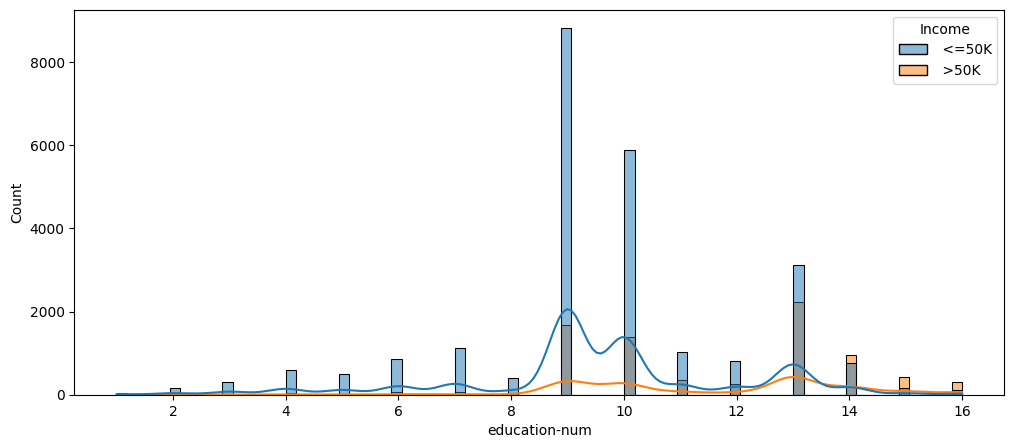

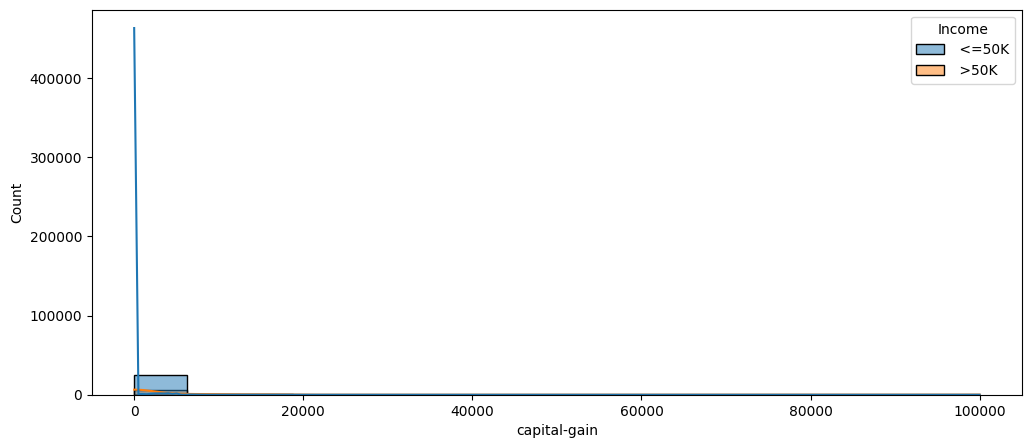

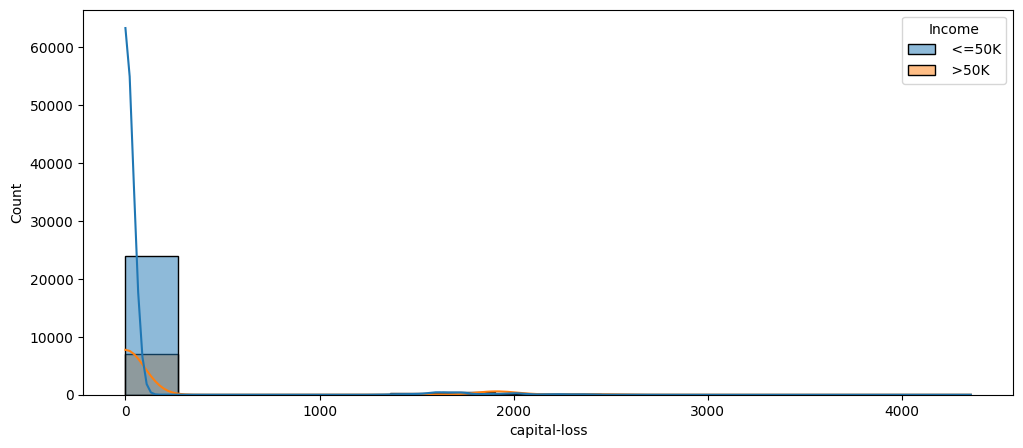

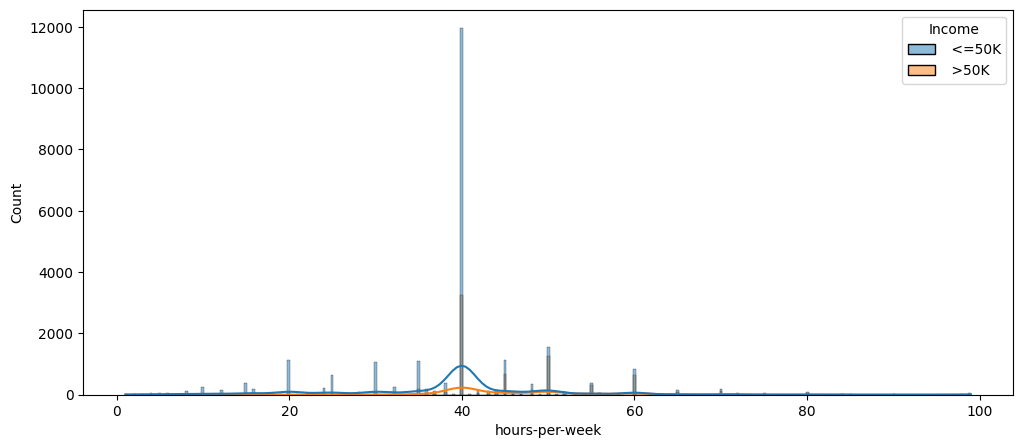

In [35]:
for i in numerical_features:
    plt.figure(figsize=(12,5))
    sns.histplot(df,x=i,hue=df['Income'],kde=True)
    plt.show()

# Observation
- In age column most of the peoples earning >50k and its shows a different type of distribution
- The education-num column,higher educated peoples are earning >50K.
- Capital-gain peoples are earn >50K.

# Feature Engineering

In [36]:
# Handling Income column
df['Income']=df['Income'].str.replace("<=50K","0")
df['Income']=df['Income'].str.replace(">50K","1")


In [37]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


In [38]:
# Check messing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [40]:
df['Income'].unique()

array([' 0', ' 1'], dtype=object)

In [41]:
df['Income']=df['Income'].astype('int64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  Income          32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [43]:
numerical_features1=[feature for feature in df.columns if df[feature].dtype=='Object']
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

<Axes: >

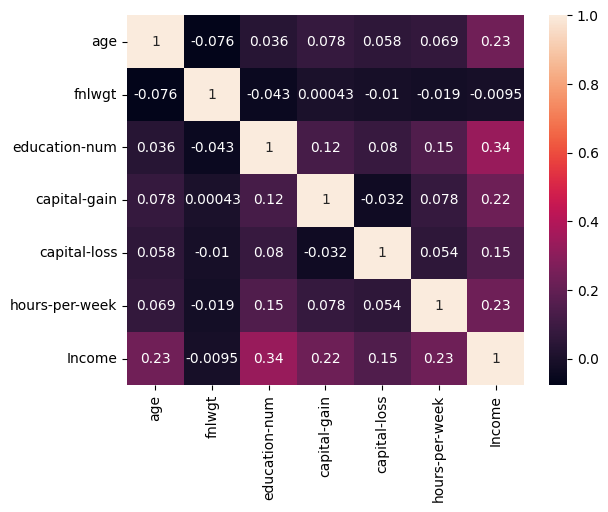

In [44]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Observation
- numeric dataset has not strong correlation
- here Income and education are highest correlation is 0.34

In [45]:
# Replacing missing values by mode this values are present in categorical columns
df['workclass']=df['workclass'].str.replace("?","Private")
df['occupation']=df['occupation'].str.replace("?","Prof-specialty")
df['native-country']=df['native-country'].str.replace("?","United-States")

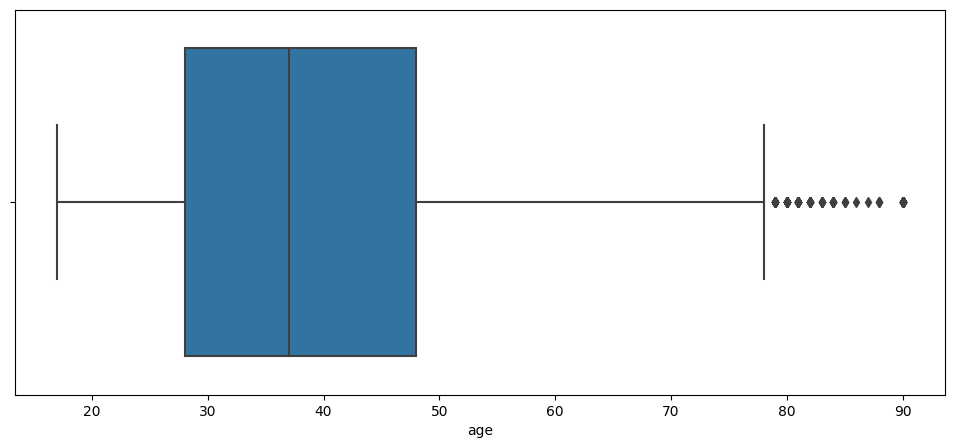

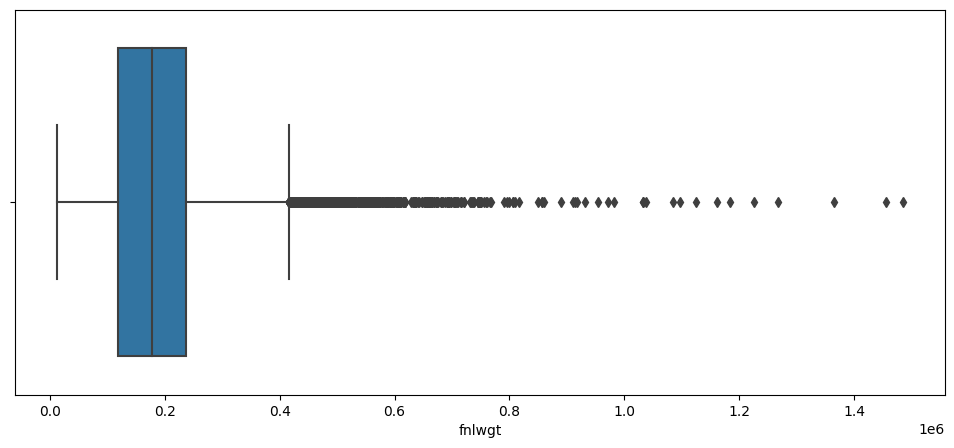

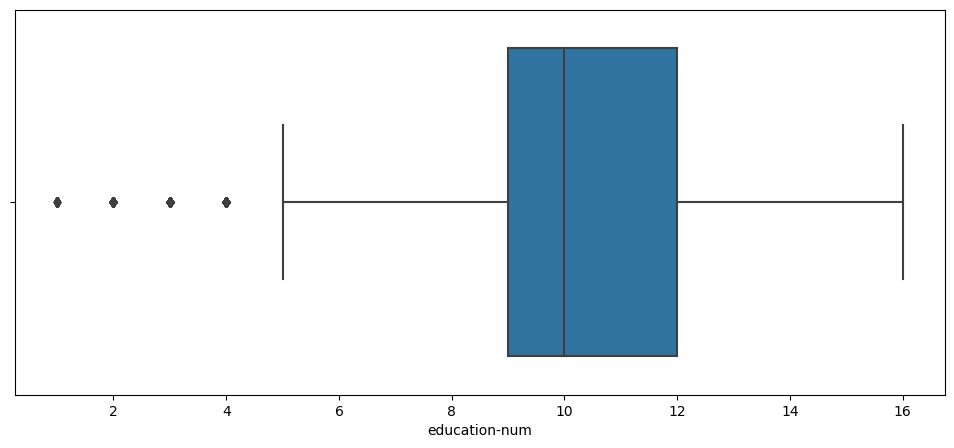

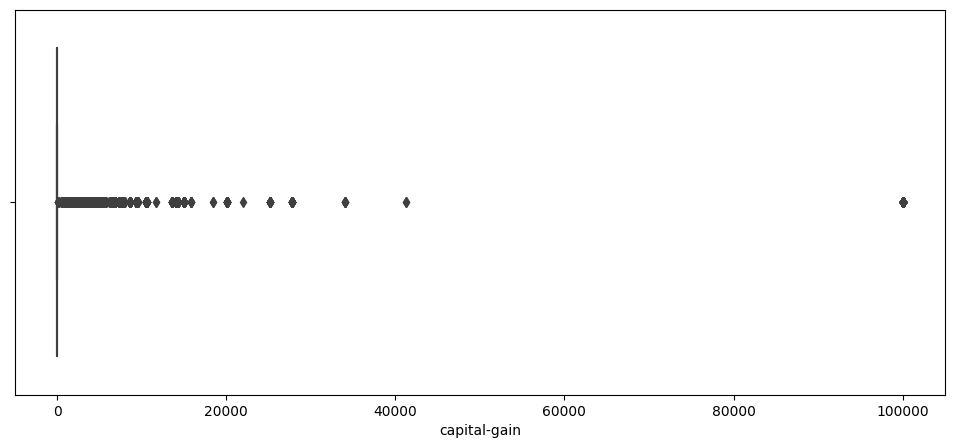

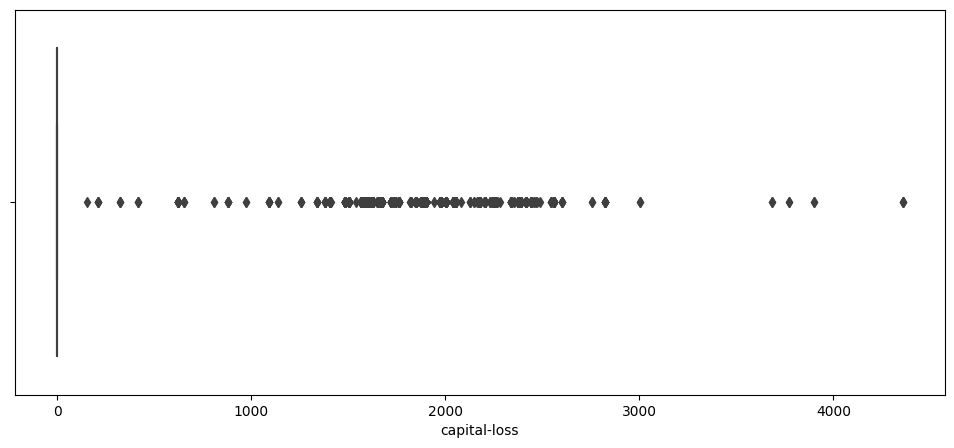

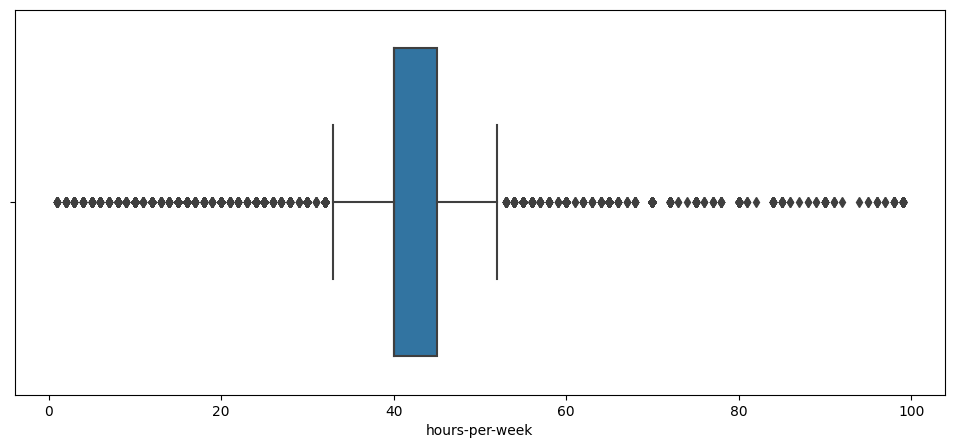

In [46]:
# Outlier Detection
for i in numerical_features:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=df[i])
    plt.show()

# Observation
numeric columns are present in outliers

In [50]:
df['capital-gain'].value_counts()

capital-gain
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64